In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/# DS Capstone/2 Multi-linear

/content/drive/MyDrive/# DS Capstone/2 Multi-linear


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load file
file_path = './data_10y.xlsx'
df = pd.read_excel(file_path)

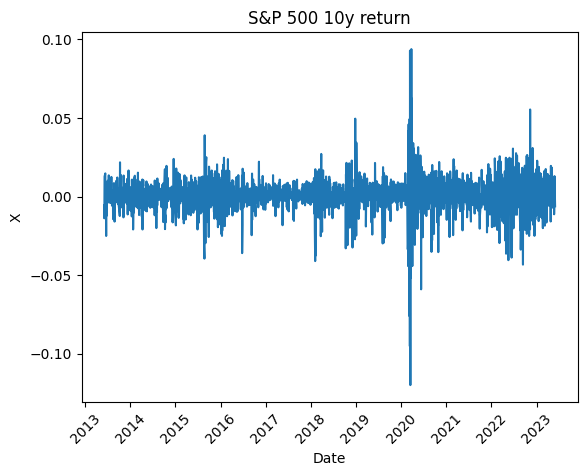

In [ ]:
# Plot the data
plt.plot(df['date'], df['sp_10y'])
plt.xlabel('Date')
plt.ylabel('X')
plt.title('S&P 500 10y return')
plt.xticks(rotation=45)
plt.show()

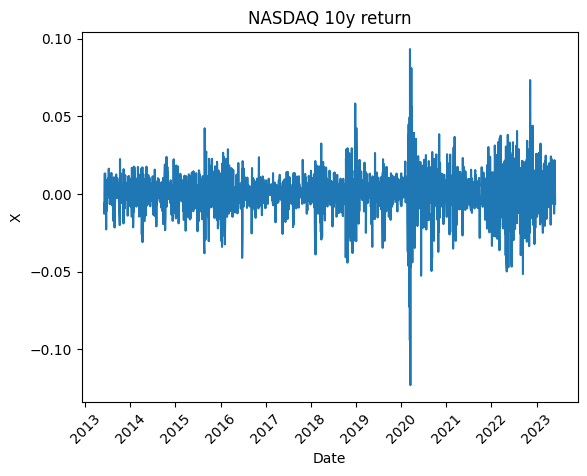

In [ ]:
# Plot the data
plt.plot(df['date'], df['nas_10y'])
plt.xlabel('Date')
plt.ylabel('X')
plt.title('NASDAQ 10y return')
plt.xticks(rotation=45)
plt.show()

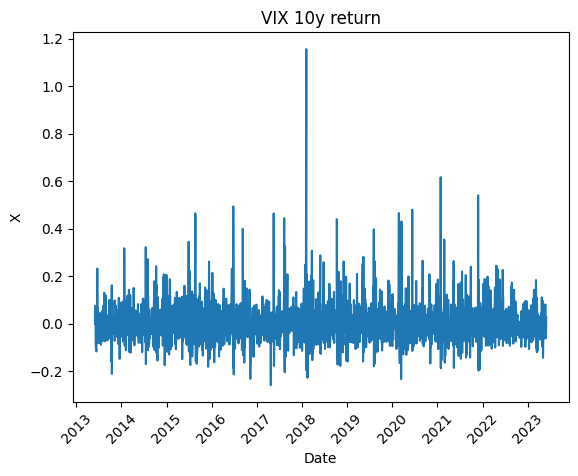

In [ ]:
# Plot the data
plt.plot(df['date'], df['vix_10y'])
plt.xlabel('Date')
plt.ylabel('X')
plt.title('VIX 10y return')
plt.xticks(rotation=45)
plt.show()

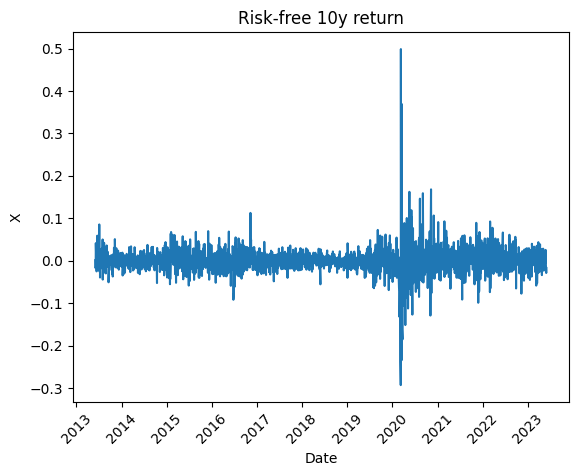

In [ ]:
# Plot the data
plt.plot(df['date'], df['rf_10y'])
plt.xlabel('Date')
plt.ylabel('X')
plt.title('Risk-free 10y return')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Compute correlation
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-58-c110f74110fd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,shci_10y,sp_10y,nas_10y,vix_10y,rf_10y,forward_shci_10y
shci_10y,1.000000,0.138555,0.142639,-0.099338,0.077920,0.039728
sp_10y,0.138555,1.000000,0.945831,-0.723071,0.295286,0.155139
nas_10y,0.142639,0.945831,1.000000,-0.701535,0.217536,0.166035
vix_10y,-0.099338,-0.723071,-0.701535,1.000000,-0.213199,-0.179912
rf_10y,0.077920,0.295286,0.217536,-0.213199,1.000000,-0.012939
forward_shci_10y,0.039728,0.155139,0.166035,-0.179912,-0.012939,1.000000


In [ ]:
df.drop(df.tail(1).index,inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)

In [ ]:
import statsmodels.api as sm

X = df[['shci_10y', 'sp_10y', 'nas_10y', 'vix_10y', 'rf_10y']]
y = df['forward_shci_10y']

X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       forward_shci_10y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     19.25
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           8.03e-19
Time:                        11:25:51   Log-Likelihood:                 6905.9
No. Observations:                2349   AIC:                        -1.380e+04
Df Residuals:                    2343   BIC:                        -1.377e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.779      0.4

In [62]:
from sklearn.metrics import mean_squared_error

predictions = results.predict(X)

rmse = np.sqrt(mean_squared_error(y, predictions))

print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 0.012792913782873614
